# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


772

In [3]:
#AGP TEST - what are our cities?
cities

['cape town',
 'mataura',
 'coihaique',
 'aksarka',
 'roebourne',
 'teya',
 'sorland',
 'qaanaaq',
 'busselton',
 'comodoro rivadavia',
 'pitimbu',
 'punta arenas',
 'east london',
 'cherskiy',
 'harlingen',
 'ushuaia',
 'port alfred',
 'bredasdorp',
 'yellowknife',
 'nalut',
 'hobart',
 'ilulissat',
 'lebu',
 'carutapera',
 'jamestown',
 'songkhla',
 'illoqqortoormiut',
 'bondo',
 'talcahuano',
 'yerbogachen',
 'ancud',
 'taolanaro',
 'mar del plata',
 'bluff',
 'ornskoldsvik',
 'tasiilaq',
 'hermanus',
 'saint george',
 'rikitea',
 'new norfolk',
 'albany',
 'port hardy',
 'bengkulu',
 'baykalovo',
 'upernavik',
 'hithadhoo',
 'saint-philippe',
 'murgab',
 'ribeira grande',
 'puerto ayora',
 'atuona',
 'mehamn',
 'haines junction',
 'kampene',
 'nizhneyansk',
 'alofi',
 'muisne',
 'mikkeli',
 'ariquemes',
 'sentyabrskiy',
 'nikolskoye',
 'lagoa',
 'ponta do sol',
 'dukat',
 'aguas vermelhas',
 'cabo san lucas',
 'berlevag',
 'methoni',
 'kyabe',
 'butaritari',
 'tommot',
 'barentsbur

In [4]:
#Create a smaller list to test code with
city_short = cities[0:10]
city_short

['cape town',
 'mataura',
 'coihaique',
 'aksarka',
 'roebourne',
 'teya',
 'sorland',
 'qaanaaq',
 'busselton',
 'comodoro rivadavia']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#check out what a single entry looks like: 
params = {"appid": weather_api_key, 
          "q": "sidney",
          "units": "imperial" 
}
url = "https://api.openweathermap.org/data/2.5/weather"

# Run a request to endpoint and convert result to json
sidney_data = requests.get(url, params=params).json()

# Print the json
print(sidney_data)

{'coord': {'lon': 151.21, 'lat': -33.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.21, 'feels_like': 56.19, 'temp_min': 59, 'temp_max': 61, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 11.01, 'deg': 270, 'gust': 11.99}, 'clouds': {'all': 98}, 'dt': 1604179649, 'sys': {'type': 3, 'id': 2001174, 'country': 'AU', 'sunrise': 1604170480, 'sunset': 1604218961}, 'timezone': 39600, 'id': 2147714, 'name': 'Sydney', 'cod': 200}


In [6]:
#Get the full list of cities

cities_2 = []
lat = []
lon = []
max_temp = []
humid = []
cloud = []
wind_spd = []
country = []
dt = []
record = 0
length = len(cities)
units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    
    response = requests.get(query_url+city).json()
    
    try:
        cities_2.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        
    except:
        print("City not found! "+ city)
        
    record += 1    
    print(f"Processing record {record} of {length}|{city}")

Processing record 1 of 772|cape town
Processing record 2 of 772|mataura
Processing record 3 of 772|coihaique
Processing record 4 of 772|aksarka
Processing record 5 of 772|roebourne
Processing record 6 of 772|teya
Processing record 7 of 772|sorland
Processing record 8 of 772|qaanaaq
Processing record 9 of 772|busselton
Processing record 10 of 772|comodoro rivadavia
Processing record 11 of 772|pitimbu
Processing record 12 of 772|punta arenas
Processing record 13 of 772|east london
Processing record 14 of 772|cherskiy
Processing record 15 of 772|harlingen
Processing record 16 of 772|ushuaia
Processing record 17 of 772|port alfred
Processing record 18 of 772|bredasdorp
Processing record 19 of 772|yellowknife
Processing record 20 of 772|nalut
Processing record 21 of 772|hobart
Processing record 22 of 772|ilulissat
Processing record 23 of 772|lebu
Processing record 24 of 772|carutapera
Processing record 25 of 772|jamestown
Processing record 26 of 772|songkhla
City not found! illoqqortoormiut

In [7]:
#put the data into a data frame:

response_df = pd.DataFrame({ 
        'City': cities_2,
        'Lat': lat,
        'Lon': lon,
        'Max Temp': max_temp,
        'Humidity': humid,
        'Cloudiness': cloud,
        'Wind Speed': wind_spd,
        'Country': country,
        'Date': dt,
})


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# #WILL ALSO NEED TO EXPORT PNGS OF GRAPHS

response_df.to_csv('cities.csv')
output_data_file

'output_data/cities.csv'

In [10]:
response_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,61.00,55,0,13.87,ZA,1604179631
1,Mataura,-46.19,168.86,57.99,65,20,8.99,NZ,1604179760
2,Coyhaique,-45.58,-72.07,77.00,20,0,8.05,CL,1604179761
3,Aksarka,66.56,67.80,29.35,97,9,14.38,RU,1604179686
4,Roebourne,-20.78,117.13,69.67,78,0,10.42,AU,1604179761


In [11]:
response_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,7.030000e+02
mean,22.679417,19.714851,57.598535,71.992888,50.009957,8.190484,1.604180e+09
std,32.364141,88.201761,22.329603,21.547105,39.971695,5.450338,1.015147e+02
min,-54.800000,-175.200000,-8.070000,8.000000,0.000000,0.510000,1.604179e+09
25%,-2.660000,-58.995000,42.080000,62.000000,1.000000,4.125000,1.604180e+09
50%,28.370000,24.670000,63.000000,77.000000,50.000000,6.930000,1.604180e+09
75%,49.770000,96.785000,77.000000,88.000000,90.000000,10.940000,1.604180e+09
max,78.220000,179.320000,89.600000,100.000000,100.000000,34.450000,1.604180e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#SKIPPED - no humidity over 100%

In [13]:
##  Get the indices of cities that have humidity over 100%.

# (skipped - no humidity over 100%)

In [14]:
## Make a new DataFrame equal to the city data to drop all humidity outliers by index.
## Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# (skipped - no humidity over 100%)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

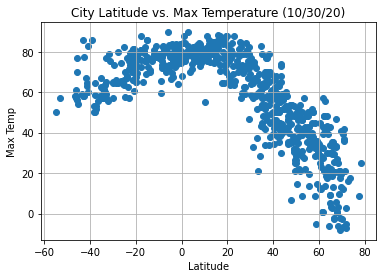

In [49]:
# LAT v TEMP

x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values,y_values)
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (10/30/20)')
plt.grid(True, linestyle='-')
plt.savefig("Images/LatTemp.png")
plt.show()

In [16]:
# The code is plotting the latitude of cities against their max temperture
# (deg Farenhieght) at the time of sampling (10-30-2020, 11:50 pm PST). It 
# shows that the hottest part of the world is closest to the equator. 
# The recorded max temperature decreased as the city's latitude moves 
# further away from the equator.
# Additionally, cities in the Southern hemisphere have a higher average 
# Max Temperature.

## Latitude vs. Humidity Plot

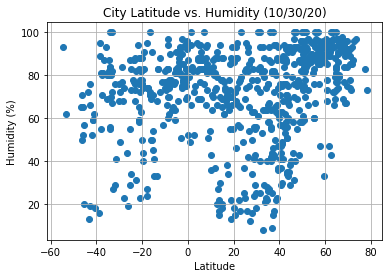

In [50]:
#LAT v HUMIDITY

x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/30/20)')
plt.grid(True, linestyle='-')
plt.savefig("Images/LatHumid.png")
plt.show()

In [18]:
# The code is plotting the latitude of cities against their humidity at 
# the time of sampling (10-30-2020, 11:50 pm PST). 
# It shows that there is higher humidity in cities near the equator. 
# Cities at higher and lower latitidues display a wide range of humidity,
# though cities close to the poles again display high humidity.

## Latitude vs. Cloudiness Plot

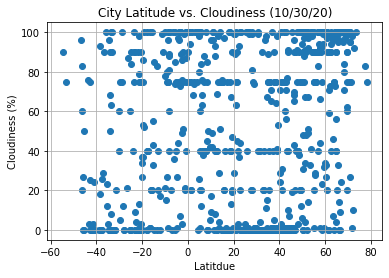

In [62]:
#LAT v Cloudiness

x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitdue')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/30/20)')
plt.grid(True, linestyle='-')
plt.savefig("Images/LatCloud.png")
plt.show()

In [20]:
# The code is plotting the latitude of cities against their cloudiness 
# at the time of sampling (10-30-2020, 11:50 pm PST). 
# The data does not describe a clear correlation between the two categories,
# suggesting that latitude does not predict cloudiness

## Latitude vs. Wind Speed Plot

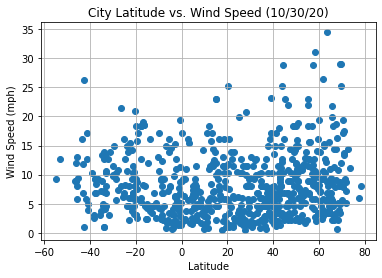

In [61]:
#Lat v Wind
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/30/20)')
plt.grid(True, linestyle='-')
plt.savefig("Images/LatWind.png")
plt.show()

In [22]:
# The code is plotting the latitude of cities against wind speed at the 
# time of sampling (10-30-2020, 11:50 pm PST). It shows that most 
# cities had a wind speed of under 31 mph which constitutes only a "strong 
# breeze" or less on the Beauford scale. Several outliers may have a light
# gale at the time of sampling, none were close to a storm (65 mph) or
# hurricane (75 mph or stronger) There does not appear to be an 
# observable correlation between categories to demonstrate a 
# direct relationship.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8663918987795174


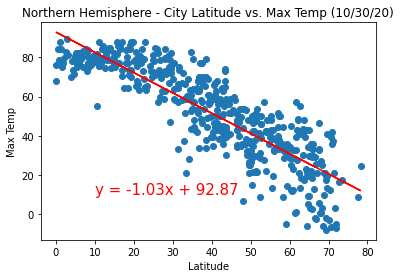

In [53]:
# Northern - Temp v Lat
north_df = response_df.loc[response_df["Lat"]>=0, :]

x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 10), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - City Latitude vs. Max Temp (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NorthTempLatREG.png")
plt.show()

In [24]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Northern Hemisphere against 
# their Max Temp at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# The scatter plot seems to indicate that the higher the lower the 
# latitude (closer to the equator), the higher the Max temperature. This 
# is confirmed by the line of linear regression which has an r-value of 
# -0.89, which indicates that the cities closely follow this pattern.
# (The negative signals that the correlation has a negative slope, or 
# "the higher the latitude (x) the lower the temperature (y)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6486288977401099


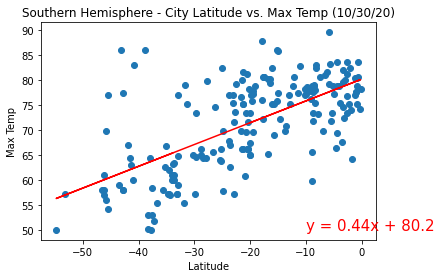

In [54]:
#Southern - Temp V Lat
south_df = response_df.loc[response_df["Lat"]<0, :]

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 50), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - City Latitude vs. Max Temp (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SouthTempLatREG.png")
plt.show()

In [26]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Southern Hemisphere against 
# their Max Temp at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# Similar to the scatter plot for the Northern cities, this graph
# seems to indicate that the higher the lower the latitude (closer 
# to the equator), the higher the Max temperature. 

# This is confirmed by the line of linear regression. However, 
# r-value is only 0.60, which confirms the visual observation that these
# cities are less closely predicted by the regression equation. The data 
# appears to clump close to the equator, which may indicate a bias in 
# the sample data. Alternately, it may indicate that there is more 
# variation in the climates of the Southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2819642210491905


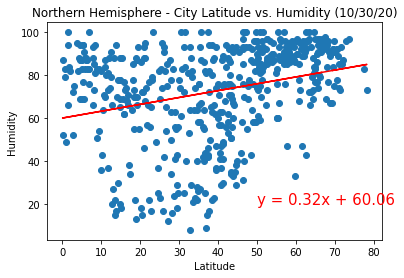

In [55]:
#North - Humidity v. Lat

x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitude vs. Humidity (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NorthHumidLatREG.png")
plt.show()

In [28]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Northern Hemisphere against 
# their Humidity at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# As observed on the map of lat v. humity globally, it seems to capture
# a concentration of humidity in near the equator and towards the pole 
# at the time of sampling. This data is not well captured by a linear 
# regression model (r-value = 0.37), suggesting there is not a direct
# relationship between humdity and latitude in the Northern Hemisphere. 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2853075640917475


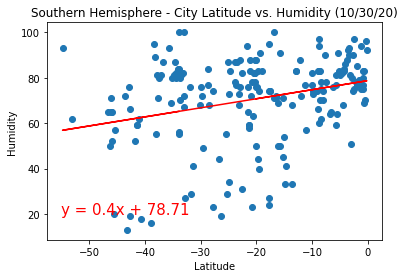

In [56]:
#South - Humidity v Lat

x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitude vs. Humidity (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SouthHumidLatREG.png")
plt.show()

In [30]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Southern Hemisphere against 
# their humidity at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# The scatter plot does not seem to demonstrate a clear pattern. It very
# loosely describes the pattern observed globally and in the Northern 
# hemisphere of high humidity near cities approaching the pole and equator
# and greater variation in between. 
# This is confirmed by the line of linear regression which has an r-value 
# of only 0.22, which indicates that the cities do not closely follow the 
# pattern described by the linear regression model. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20755217330308828


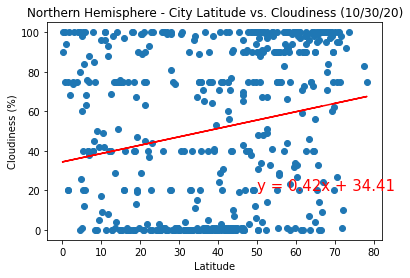

In [64]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NorthCloudLatREG.png")
plt.show()

In [32]:
# This code maps a linear regression on top of the scatter plot of Northern
# hemisphere cities (cloudiness vs. latitude). As discussed in previous 
# steps above, there is not a strong linear corelation between the variables.
# This is confirmed by the low r-value (0.19). Latitidue does not appear 
# to indicate cloudiness by this model.

# On a second note, the Cloudiness factor appears to clump at certain
# percentages (notablely 0%, 20%, 40%, 70% and 100%) creating a visual
# "band" obervable across all latitidues. This suggests
# there may be an unobserved factor that influences Northern cloundiness,
# causing certain percentages to be more likely than other regardless 
# of latitidue.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2947893509079438


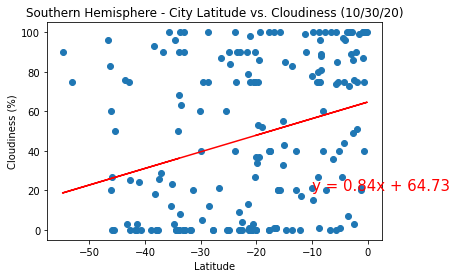

In [63]:
#South - Cloudiness v. Lat

x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SouthernCloudLatREG.png")
plt.show()

In [34]:
# This code maps a linear regression on top of the scatter plot of Southern
# hemisphere cities (cloudiness vs. latitude). As discussed in previous 
# steps above, there is not a strong linear corelation between the variables.
# This is confirmed by the low r-value (0.39). Latitidue does not appear 
# to indicate cloudiness by this model.
# Secondarily, the strong bands of Cloudiness observed in the Northern 
# hemisphere are not observed in the Southern hemisphere, though some 
# observable groupings occur close to 0% and 100%. Comparing this data
# to available data from www.windfinder.com suggests that these "bands"
# may be related to global cloud and wind patterns.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19569844253790333


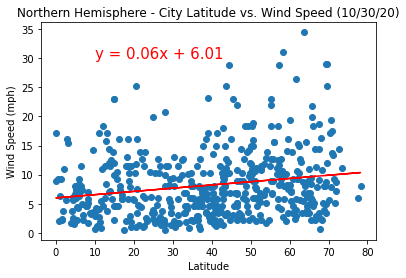

In [59]:
# North - wind speed v lat

x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 30), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NorthWindLatREG.png")
plt.show()

In [36]:
# This models a linear regression path on a scatter plot of Northern
# cities (Lat by Wind Speed). There does not appear to be a linear relationship
# between wind speed and latitude in the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18995450794703214


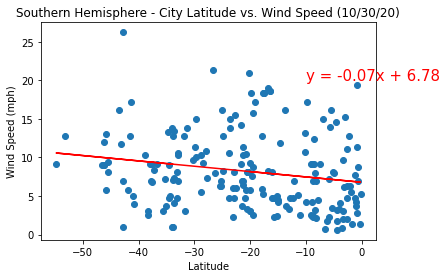

In [60]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SouthWindLatREG.png")
plt.show()

In [38]:
# This models a linear regression path on a scatter plot of Southern
# cities (Lat by Wind Speed). There does not appear to be a linear relationship
# between wind speed and latitude in the Southern hemisphere.

In [39]:
    ##FINAL OBSERVATIONS:
# The sample set of data seems to be well distributed around the world. The data demonstrates
# clearly that there is a direct correlation between latitude and temperature. When we look at
# the Northern and Southern hemispheres in isolation each segment can be approximated by a 
# linear regression as demostrated by their respectively high r-values. 

# Humidity, cloudiness and weather patterns do not appear to have a clear direct relationship 
# as modeled by a linear regression. 
    # - Windiness appears to have little observable patterns with this data.
    # 
    # - Humidity appears to be related to latitude in as far as the poles and equator have 
    # a significantly higher average humidity and less variation than the areas in between, but 
    # is not clearly modeled by linear regression.
    #
    # - The Cloudiness factor appears to have banding at certain percentages (notablely 0%, 20%, 
    # 40%, 70% and 100%). This suggests there may be an unobserved factor that influences 
    # cloudiness at certain percentages to be more likely than other percentages regardless 
    # of latitidue. This factor is likely related to either the system for determining the 
    # Cloudiness factor and/or underlying rules of atmospheric science. 
